# Decision Tree Classification

In [16]:
# Imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import category_encoders as ce
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

## Read Datasets

In [3]:
df_day_minus_0 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_0.csv')
df_day_minus_1 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_1.csv')
df_day_minus_2 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_2.csv')
df_day_minus_7 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_7.csv')

C:\Users\ali_m\AppData\Local\Temp\ipykernel_14804\2795191405.py:1: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_day_minus_0 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_0.csv')


Split into x and y

In [4]:
X_0 = df_day_minus_0.drop(columns=['failure', 'date', 'serial_number', 'file_date'], axis=1)
X_1 = df_day_minus_1.drop(columns=['failure', 'date', 'serial_number'], axis=1)
X_2 = df_day_minus_2.drop(columns=['failure', 'date', 'serial_number'], axis=1)
X_7 = df_day_minus_7.drop(columns=['failure', 'date', 'serial_number'], axis=1)

Y_0 = df_day_minus_0['failure']
Y_1 = df_day_minus_1['failure']
Y_2 = df_day_minus_2['failure']
Y_7 = df_day_minus_7['failure']

Split into training and testing

In [5]:
encoder_0 = ce.OrdinalEncoder(cols=['model', 'capacity_bytes'])
encoder_1 = ce.OrdinalEncoder(cols=['model', 'capacity_bytes'])
encoder_2 = ce.OrdinalEncoder(cols=['model', 'capacity_bytes'])
encoder_7 = ce.OrdinalEncoder(cols=['model', 'capacity_bytes'])

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, Y_0, test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, Y_2, test_size=0.2, random_state=42)
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, Y_7, test_size=0.2, random_state=42)

X_train_0 = encoder_0.fit_transform(X_train_0)
X_test_0 = encoder_0.transform(X_test_0)

X_train_1 = encoder_1.fit_transform(X_train_1)
X_test_1 = encoder_1.transform(X_test_1)

X_train_2 = encoder_2.fit_transform(X_train_2)
X_test_2 = encoder_2.transform(X_test_2)

X_train_7 = encoder_0.fit_transform(X_train_7)
X_test_7 = encoder_0.transform(X_test_7)

Hyperparameter Tuning

In [10]:
param_grid = {
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 4, 8, 16, 32, 64],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'criterion': ['gini', 'entropy']
}

dt_model_0_cv = tree.DecisionTreeClassifier(random_state=31)

# Perform grid search for hyperparameter tuning
grid_search_0 = GridSearchCV(dt_model_0_cv, param_grid, cv=5)
grid_search_0.fit(X_train_0, y_train_0)

print(grid_search_0.best_params_)

df_gridsearch_results_0 = pd.DataFrame(grid_search_0.cv_results_)
df_hyperparameters = df_gridsearch_results_0[['rank_test_score','mean_test_score','std_test_score','param_criterion','param_max_depth','param_min_samples_leaf','param_min_samples_split']]

# {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 32}

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 32}


# Train Models

Day minus 0

In [12]:
# Train the decision tree model
dt_model_0 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8, min_samples_split=32, random_state=31)
dt_model_0.fit(X_train_0, y_train_0)

test_predictions_0 = dt_model_0.predict(X_test_0)
cm = confusion_matrix(y_true=y_test_0, y_pred=test_predictions_0)
print(cm)

# Evaluate the model on test set
test_accuracy_0 = dt_model_0.score(X_test_0, y_test_0)
print("Test Accuracy:", test_accuracy_0)

[[2575  134]
 [ 666 2099]]
Test Accuracy: 0.8538545853123858


smart_4_normalized      0.000000
smart_3_raw             0.000000
smart_10_raw            0.000000
smart_10_normalized     0.000000
smart_192_normalized    0.000000
smart_194_raw           0.000000
smart_188_normalized    0.000000
smart_12_normalized     0.000000
smart_197_normalized    0.000000
smart_241_normalized    0.000000
smart_199_normalized    0.000000
smart_242_normalized    0.000000
smart_240_normalized    0.000000
smart_198_normalized    0.000000
smart_5_normalized      0.000334
smart_7_normalized      0.000540
smart_190_normalized    0.000794
smart_188_raw           0.000915
smart_194_normalized    0.001376
capacity_bytes          0.001671
smart_193_normalized    0.001820
smart_9_normalized      0.001871
smart_190_raw           0.002262
smart_3_normalized      0.003040
smart_1_normalized      0.003068
smart_4_raw             0.003904
model                   0.003937
smart_1_raw             0.004412
smart_199_raw           0.004946
smart_12_raw            0.006791
smart_7_ra

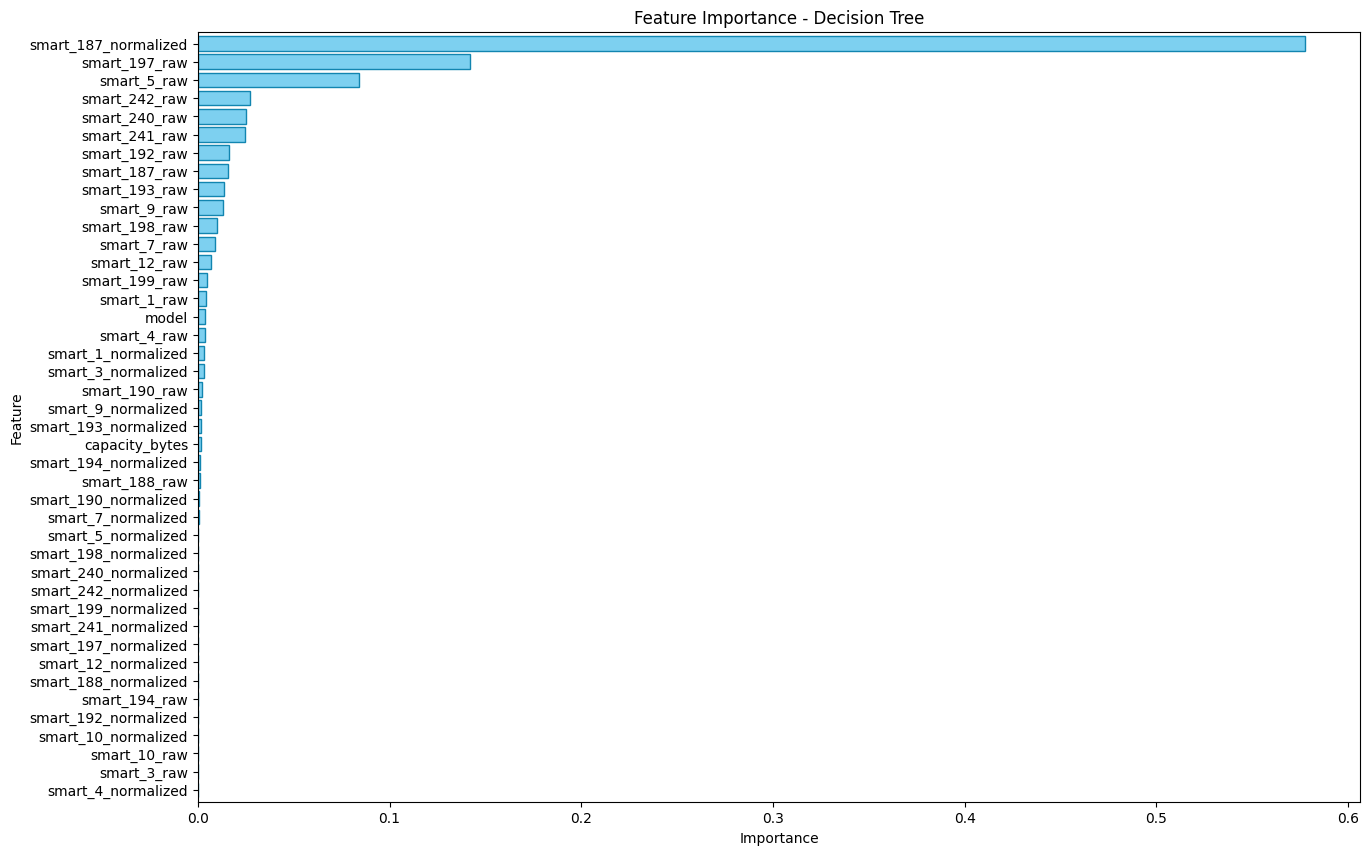

In [18]:
# Display feature importance
plt.figure(figsize=(15,10))

feature_importances_0 = pd.Series(dt_model_0.feature_importances_, index=X_train_0.columns)
feature_importances_0.sort_values(ascending=True, inplace=True)
fig = feature_importances_0.plot.barh(color=[(0.49, 0.816, 0.941)], edgecolor=[(0.071, 0.522, 0.69)], width=0.8, align='center')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Decision Tree")

print(feature_importances_0)

0.8990407035152399


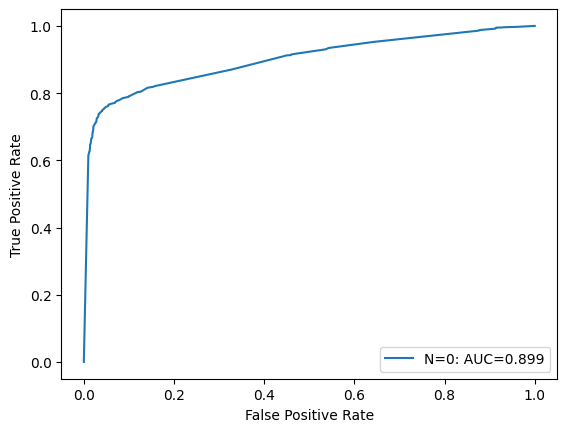

In [19]:
# Calculate AUROC
fpr_0, tpr_0, _ = roc_curve(y_test_0, dt_model_0.predict_proba(X_test_0)[:,1])
auc_0 = round(roc_auc_score(y_test_0, dt_model_0.predict_proba(X_test_0)[:,1]), 4)
plt.plot(fpr_0,tpr_0,label="N=0: AUC="+str(auc_0))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

auroc_score_0 = roc_auc_score(y_true=y_test_0, y_score=dt_model_0.predict_proba(X_test_0)[:,1])
print(auroc_score_0)

Day minus 1

In [20]:
# Train the random forest model
dt_model_1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8, min_samples_split=32, random_state=31)
dt_model_1.fit(X_train_1, y_train_1)

test_predictions_1 = dt_model_1.predict(X_test_1)
cm = confusion_matrix(y_true=y_test_1, y_pred=test_predictions_1)
print(cm)

# Evaluate the model on test set
test_accuracy_1 = dt_model_1.score(X_test_1, y_test_1)
# print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy_1)

[[2430  205]
 [ 692 2028]]
Test Accuracy: 0.8324929971988796


smart_4_normalized      0.000000
smart_3_raw             0.000000
smart_10_raw            0.000000
smart_5_normalized      0.000000
smart_10_normalized     0.000000
smart_193_normalized    0.000000
smart_188_normalized    0.000000
smart_12_normalized     0.000000
smart_192_normalized    0.000000
smart_197_normalized    0.000000
smart_199_normalized    0.000000
smart_242_normalized    0.000000
smart_240_normalized    0.000000
smart_241_normalized    0.000000
smart_198_normalized    0.000000
smart_1_normalized      0.000514
smart_9_normalized      0.000868
capacity_bytes          0.001033
smart_3_normalized      0.001195
smart_7_normalized      0.001486
smart_190_raw           0.001718
smart_194_normalized    0.001819
smart_194_raw           0.001875
smart_190_normalized    0.002937
smart_1_raw             0.003420
smart_199_raw           0.003559
smart_188_raw           0.005160
smart_12_raw            0.005397
smart_198_raw           0.006257
smart_4_raw             0.006369
smart_7_ra

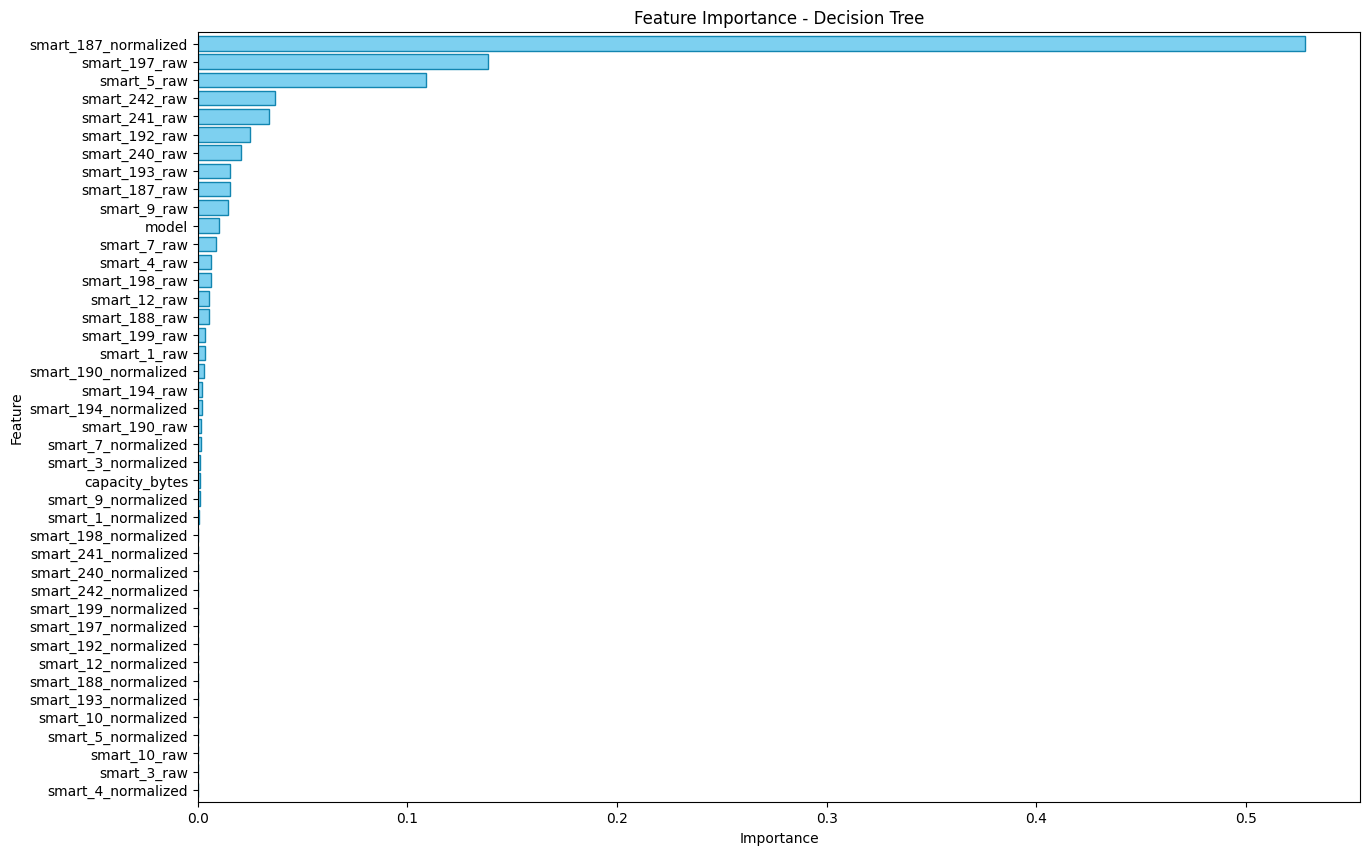

In [22]:
plt.figure(figsize=(15,10))

feature_importances_1 = pd.Series(dt_model_1.feature_importances_, index=X_train_1.columns)
feature_importances_1.sort_values(ascending=True, inplace=True)
fig = feature_importances_1.plot.barh(color=[(0.49, 0.816, 0.941)], edgecolor=[(0.071, 0.522, 0.69)], width=0.8, align='center')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Decision Tree")

print(feature_importances_1)

0.8885899653979237


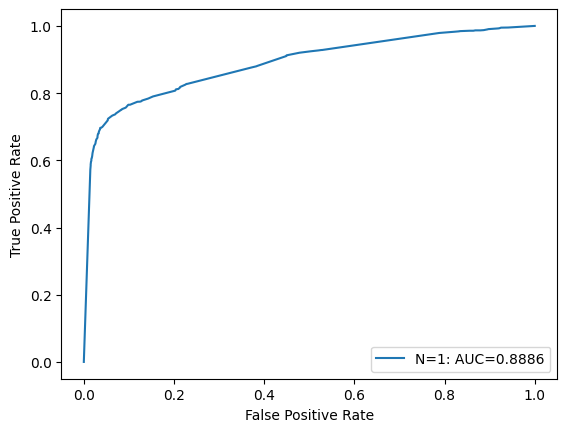

In [23]:
fpr_1, tpr_1, _ = roc_curve(y_test_1, dt_model_1.predict_proba(X_test_1)[:,1])
auc_1 = round(roc_auc_score(y_test_1, dt_model_1.predict_proba(X_test_1)[:,1]), 4)
plt.plot(fpr_1,tpr_1,label="N=1: AUC="+str(auc_1))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

auroc_score_1 = roc_auc_score(y_true=y_test_1, y_score=dt_model_1.predict_proba(X_test_1)[:,1])
print(auroc_score_1)

Day minus 2

In [24]:
# Train the decision tree model
dt_model_2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8, min_samples_split=32, random_state=31)
dt_model_2.fit(X_train_2, y_train_2)

test_predictions_2 = dt_model_2.predict(X_test_2)
cm = confusion_matrix(y_true=y_test_2, y_pred=test_predictions_2)
print(cm)

# Evaluate the model on test set
test_accuracy_2 = dt_model_2.score(X_test_2, y_test_2)
# print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy_2)

[[2479  176]
 [ 822 1873]]
Test Accuracy: 0.8134579439252336


smart_4_normalized      0.000000
smart_3_raw             0.000000
smart_10_raw            0.000000
smart_5_normalized      0.000000
smart_10_normalized     0.000000
smart_190_raw           0.000000
smart_188_normalized    0.000000
smart_12_normalized     0.000000
smart_192_normalized    0.000000
smart_197_normalized    0.000000
smart_199_normalized    0.000000
smart_242_normalized    0.000000
smart_240_normalized    0.000000
smart_241_normalized    0.000000
smart_198_normalized    0.000000
smart_3_normalized      0.000327
smart_198_raw           0.000725
smart_194_normalized    0.000919
capacity_bytes          0.001388
smart_193_normalized    0.001460
smart_9_normalized      0.001642
smart_194_raw           0.002080
smart_199_raw           0.002652
smart_7_normalized      0.003082
smart_12_raw            0.003631
smart_1_raw             0.003877
smart_188_raw           0.004914
smart_190_normalized    0.006594
smart_1_normalized      0.006808
smart_4_raw             0.007585
model     

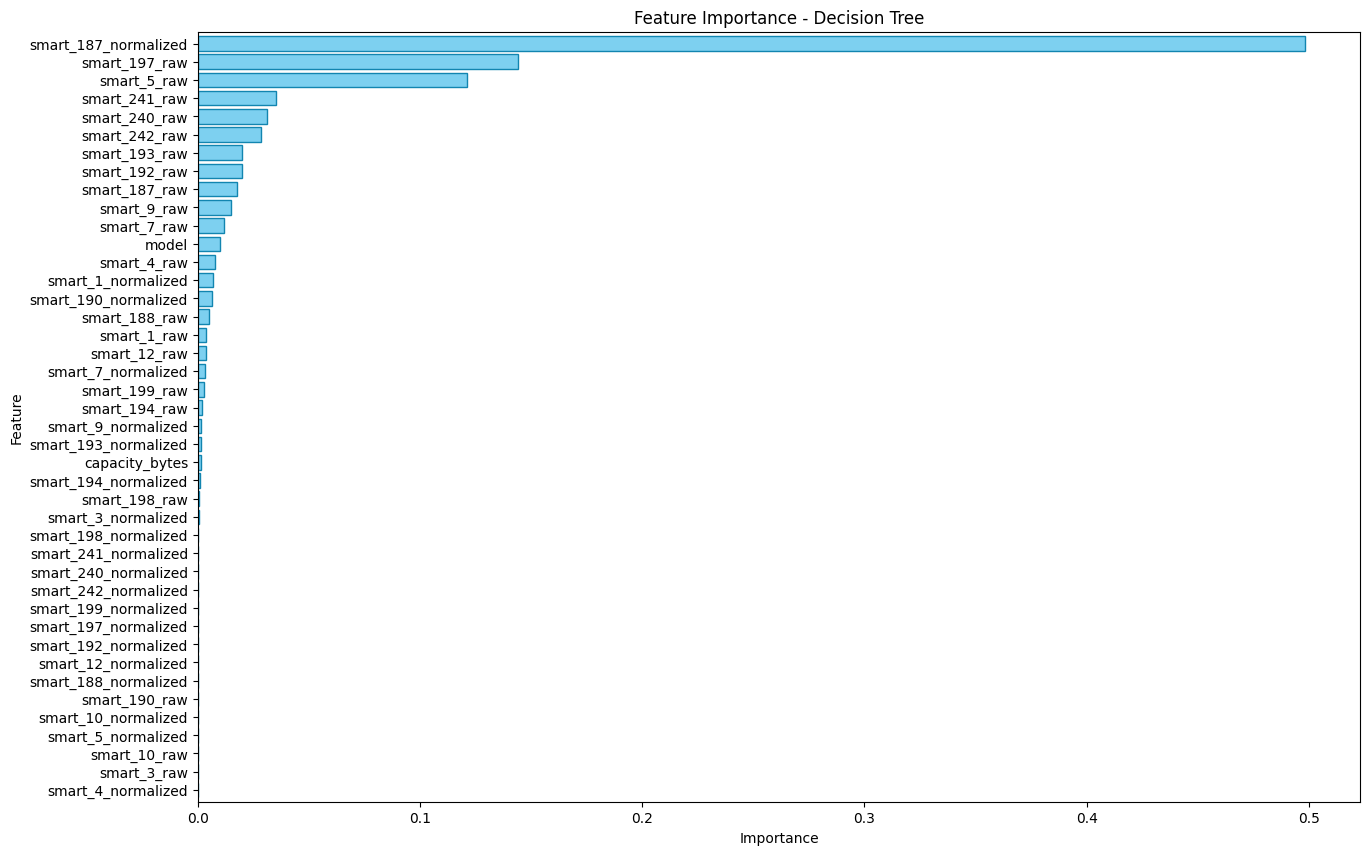

In [25]:
plt.figure(figsize=(15,10))

feature_importances_2 = pd.Series(dt_model_2.feature_importances_, index=X_train_2.columns)
feature_importances_2.sort_values(ascending=True, inplace=True)
fig = feature_importances_2.plot.barh(color=[(0.49, 0.816, 0.941)], edgecolor=[(0.071, 0.522, 0.69)], width=0.8, align='center')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Decision Tree")

print(feature_importances_2)

0.8714290605816029


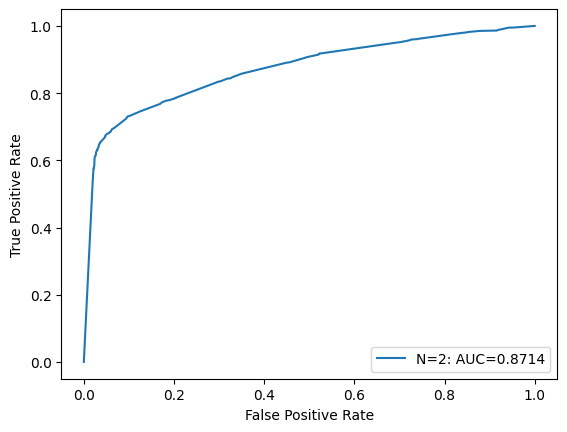

In [26]:
fpr_2, tpr_2, _ = roc_curve(y_test_2, dt_model_2.predict_proba(X_test_2)[:,1])
auc_2 = round(roc_auc_score(y_test_2, dt_model_2.predict_proba(X_test_2)[:,1]), 4)
plt.plot(fpr_2,tpr_2,label="N=2: AUC="+str(auc_2))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

auroc_score_2 = roc_auc_score(y_true=y_test_2, y_score=dt_model_2.predict_proba(X_test_2)[:,1])
print(auroc_score_2)

Day minus 7

In [27]:
# Train the decision tree model
dt_model_7 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8, min_samples_split=32, random_state=31)
dt_model_7.fit(X_train_7, y_train_7)

test_predictions_7 = dt_model_7.predict(X_test_7)
cm = confusion_matrix(y_true=y_test_7, y_pred=test_predictions_7)
print(cm)

# Evaluate the model on test set
test_accuracy_7 = dt_model_7.score(X_test_7, y_test_7)
# print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy_7)

[[2334  311]
 [ 816 1911]]
Test Accuracy: 0.7902084884586746


smart_4_normalized      0.000000
smart_3_raw             0.000000
smart_10_raw            0.000000
smart_10_normalized     0.000000
smart_192_normalized    0.000000
smart_188_raw           0.000000
smart_188_normalized    0.000000
smart_12_normalized     0.000000
smart_197_normalized    0.000000
smart_241_normalized    0.000000
smart_199_normalized    0.000000
smart_242_normalized    0.000000
smart_240_normalized    0.000000
smart_198_normalized    0.000000
capacity_bytes          0.000699
smart_9_normalized      0.000898
smart_5_normalized      0.000985
smart_190_raw           0.001371
smart_1_normalized      0.001580
smart_193_normalized    0.001595
smart_7_normalized      0.001694
smart_194_normalized    0.002124
smart_199_raw           0.002292
smart_190_normalized    0.003264
smart_194_raw           0.004265
smart_9_raw             0.004406
smart_3_normalized      0.004667
smart_198_raw           0.007331
smart_4_raw             0.008102
smart_1_raw             0.008141
smart_7_ra

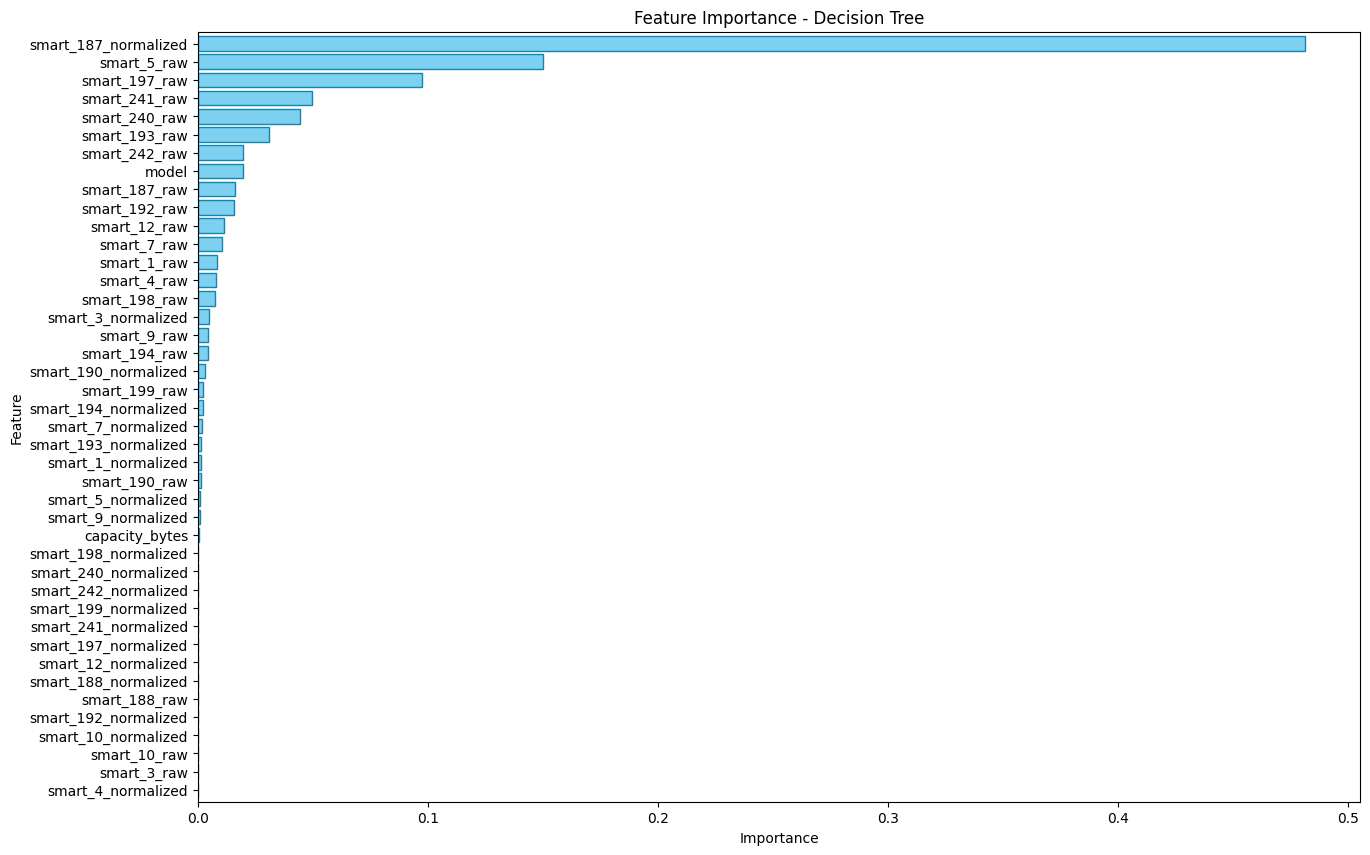

In [28]:
plt.figure(figsize=(15,10))

feature_importances_7 = pd.Series(dt_model_7.feature_importances_, index=X_train_7.columns)
feature_importances_7.sort_values(ascending=True, inplace=True)
fig = feature_importances_7.plot.barh(color=[(0.49, 0.816, 0.941)], edgecolor=[(0.071, 0.522, 0.69)], width=0.8, align='center')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Decision Tree")

print(feature_importances_7)

0.854817989675464


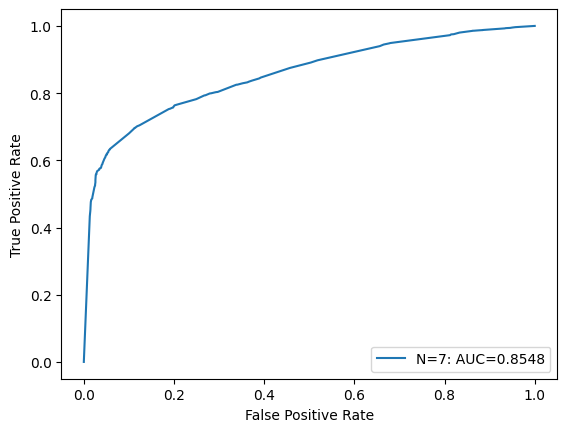

In [29]:
fpr_7, tpr_7, _ = roc_curve(y_test_7, dt_model_7.predict_proba(X_test_7)[:,1])
auc_7 = round(roc_auc_score(y_test_7, dt_model_7.predict_proba(X_test_7)[:,1]), 4)
plt.plot(fpr_7,tpr_7,label="N=7: AUC="+str(auc_7))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

auroc_score_7 = roc_auc_score(y_true=y_test_7, y_score=dt_model_7.predict_proba(X_test_7)[:,1])
print(auroc_score_7)

Plot ROC curves for each lookahead window

In [30]:
print(auroc_score_0)
print(auroc_score_1)
print(auroc_score_2)
print(auroc_score_7)

0.8990407035152399
0.8885899653979237
0.8714290605816029
0.854817989675464


In [31]:
from sklearn.model_selection import cross_val_score

cfs_0 = cross_val_score(dt_model_0, X_test_0, y_test_0, cv=5, scoring='roc_auc')
cfs_1 = cross_val_score(dt_model_1, X_test_1, y_test_1, cv=5, scoring='roc_auc')
cfs_2 = cross_val_score(dt_model_2, X_test_2, y_test_2, cv=5, scoring='roc_auc')
cfs_7 = cross_val_score(dt_model_7, X_test_7, y_test_7, cv=5, scoring='roc_auc')

print(f'N=0: AUROC:{cfs_0.mean()}, STD:{cfs_0.std()}, MAX:{cfs_0.max()}, MIN:{cfs_0.min()}')
print(f'N=1: AUROC:{cfs_1.mean()}, STD:{cfs_1.std()}, MAX:{cfs_1.max()}, MIN:{cfs_1.min()}')
print(f'N=2: AUROC:{cfs_2.mean()}, STD:{cfs_2.std()}, MAX:{cfs_2.max()}, MIN:{cfs_2.min()}')
print(f'N=7: AUROC:{cfs_7.mean()}, STD:{cfs_7.std()}, MAX:{cfs_7.max()}, MIN:{cfs_7.min()}')

N=0: AUROC:0.8817918295135929, STD:0.008617067182907294, MAX:0.8927020011610605, MIN:0.8730523878475673
N=1: AUROC:0.8648325008371469, STD:0.008424428321245968, MAX:0.8750331370688693, MIN:0.8499257032034825
N=2: AUROC:0.8476592280466372, STD:0.013238080485756226, MAX:0.8604219294291933, MIN:0.8295790838163719
N=7: AUROC:0.8292502699719015, STD:0.005255979554309606, MAX:0.8349155570327592, MIN:0.8210477298379


Text(0, 0.5, 'True Positive Rate')

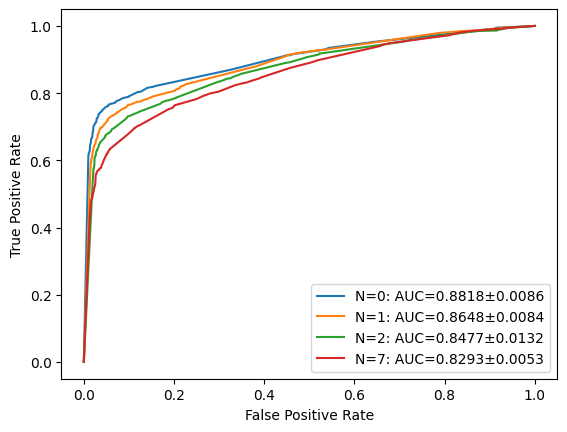

In [32]:
label_0 = f"N=0: AUC={round(cfs_0.mean(), 4)}\u00B1{round(cfs_0.std(), 4)}"
label_1 = f"N=1: AUC={round(cfs_1.mean(), 4)}\u00B1{round(cfs_1.std(), 4)}"
label_2 = f"N=2: AUC={round(cfs_2.mean(), 4):.4f}\u00B1{round(cfs_2.std(), 4)}"
label_7 = f"N=7: AUC={round(cfs_7.mean(), 4)}\u00B1{round(cfs_7.std(), 4)}"

plt.plot(fpr_0,tpr_0,label=label_0)
plt.plot(fpr_1,tpr_1,label=label_1)
plt.plot(fpr_2,tpr_2,label=label_2)
plt.plot(fpr_7,tpr_7,label=label_7)
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [33]:
feature_importances_0.name = 'day_minus_0'
feature_importances_1.name = 'day_minus_1'
feature_importances_2.name = 'day_minus_2'
feature_importances_7.name = 'day_minus_7'
features = pd.concat([feature_importances_0, feature_importances_1, feature_importances_2, feature_importances_7], axis=1)

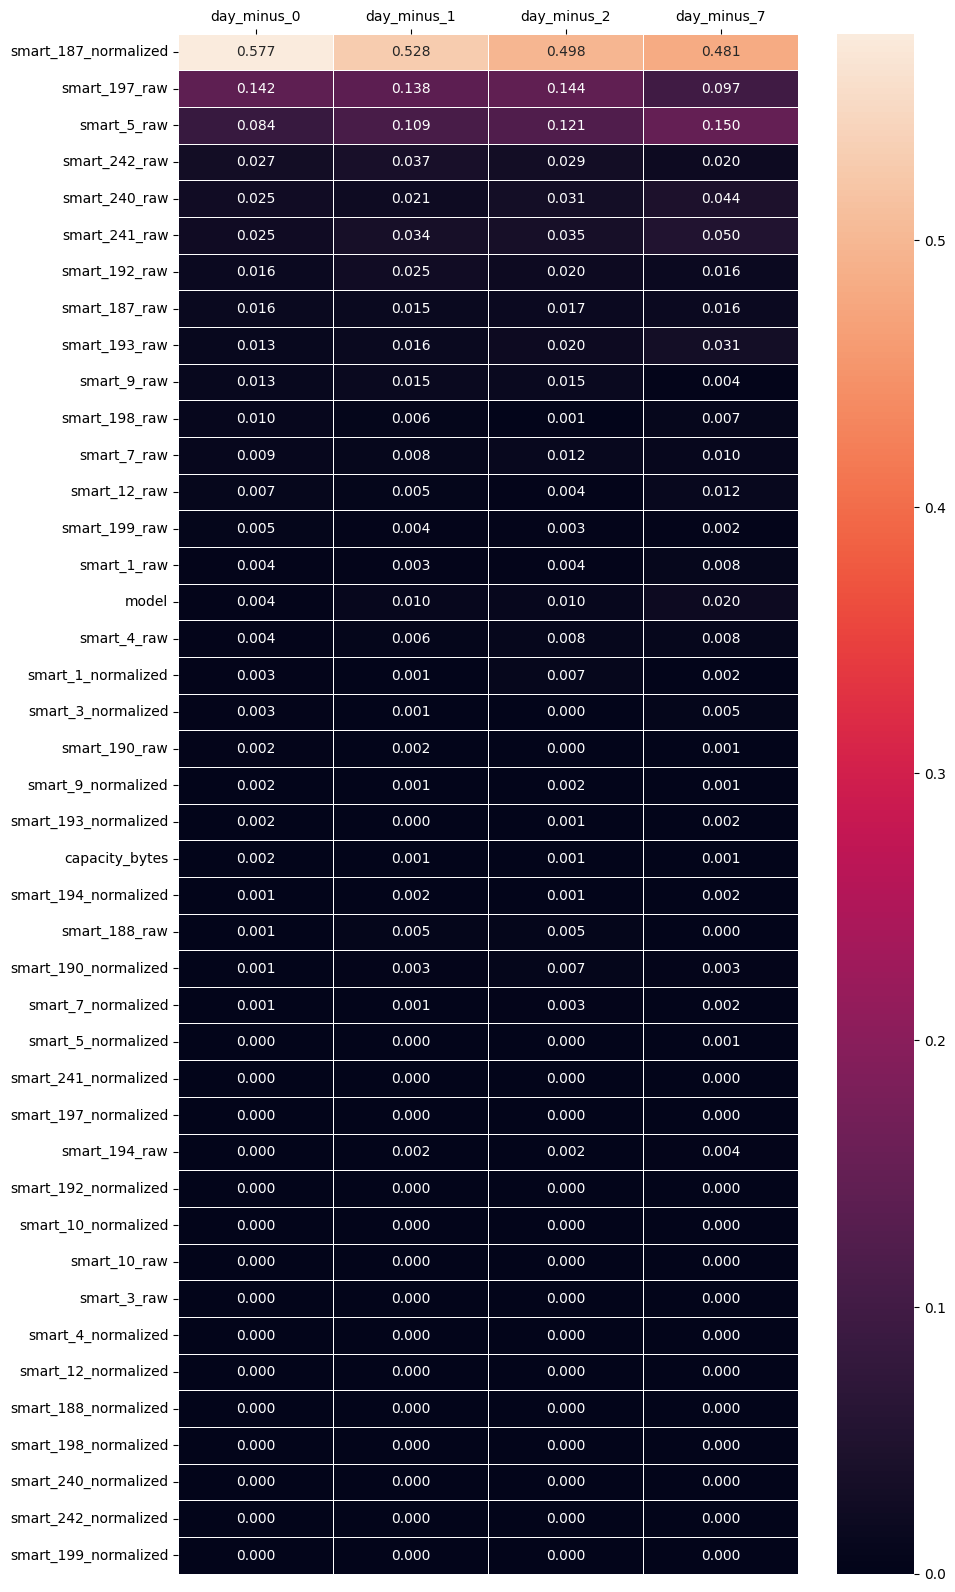

In [34]:
plt.figure(figsize=(10,20))
features.sort_values('day_minus_0', ascending=False, inplace=True)
heatmap_1 = sns.heatmap(data=features, annot=True, linewidth=.5, fmt=".3f")
heatmap_1.xaxis.tick_top()

[Text(0, 0.5, 'Feature'), Text(0.5, 0, 'Importance')]

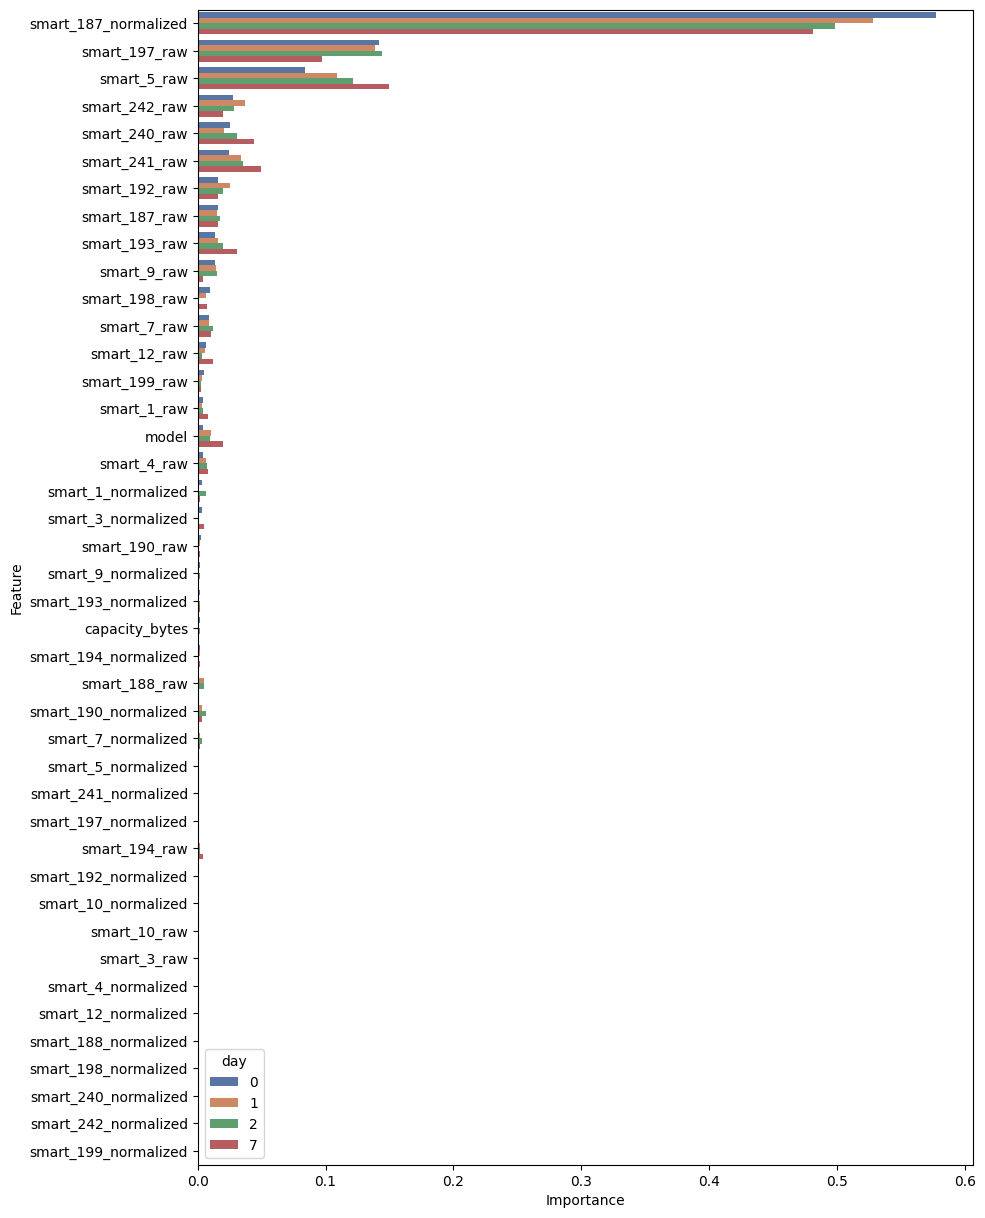

In [35]:
features['feature'] = features.index
wide_to_long = pd.wide_to_long(features, stubnames=['day_minus'], i='feature', j='day', sep="_", suffix=r"(?:\d+|n)").reset_index()

plt.figure(figsize=(10,15))
sns.barplot(data=wide_to_long, y='feature', x='day_minus', hue='day', palette='deep', orient='y').set(ylabel='Feature', xlabel='Importance')

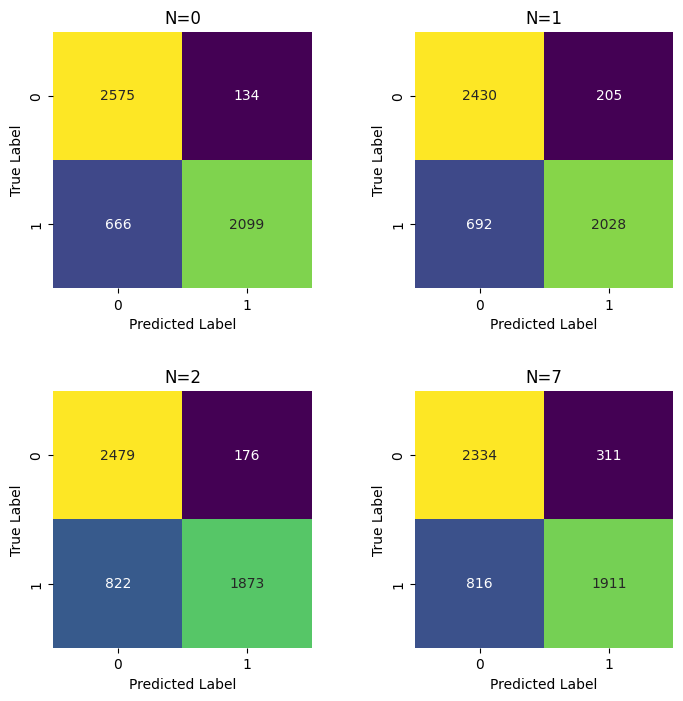

In [39]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

cm_0 = confusion_matrix(y_true=y_test_0, y_pred=test_predictions_0)
cm_1 = confusion_matrix(y_true=y_test_1, y_pred=test_predictions_1)
cm_2 = confusion_matrix(y_true=y_test_2, y_pred=test_predictions_2)
cm_7 = confusion_matrix(y_true=y_test_7, y_pred=test_predictions_7)

ax = fig.add_subplot(2, 2, 1)
sns.heatmap(cm_0, annot=True, fmt='d', cmap='viridis', cbar=False, ax=ax)
ax.title.set_text('N=0')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

ax = fig.add_subplot(2, 2, 2)
sns.heatmap(cm_1, annot=True, fmt='d', cmap='viridis', cbar=False, ax=ax)
ax.title.set_text('N=1')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

ax = fig.add_subplot(2, 2, 3)
sns.heatmap(cm_2, annot=True, fmt='d',  cmap='viridis', cbar=False, ax=ax)
ax.title.set_text('N=2')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

ax = fig.add_subplot(2, 2, 4)
sns.heatmap(cm_7, annot=True, fmt='d',  cmap='viridis', cbar=False, ax=ax)
ax.title.set_text('N=7')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.show()

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test_0, test_predictions_0))

              precision    recall  f1-score   support

           0       0.79      0.95      0.87      2709
           1       0.94      0.76      0.84      2765

    accuracy                           0.85      5474
   macro avg       0.87      0.85      0.85      5474
weighted avg       0.87      0.85      0.85      5474

